In [26]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import torch
import torchvision.datasets
import torch.optim as optim
import torch.functional
from pathlib import Path
import matplotlib.pyplot as plt
import sys

In [28]:
sys.path.append(str(Path('../../').resolve()))

In [29]:
%autoreload
from v4.pytorch_unet.resnet import ResNet
from v4.pytorch_unet.learner import Learner

[autoreload of v4.pytorch_unet.learner failed: Traceback (most recent call last):
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/software/ml/JupyterHub/conda-env-20191018-0822/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    frame = next(frame_nfo.frame for frame_nfo in inspect.stack()

In [30]:
mnist = torchvision.datasets.MNIST(Path('mnist'), download=True, transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

In [31]:
train_loader = torch.utils.data.DataLoader(mnist, batch_size=1000, shuffle=True, num_workers=4, pin_memory=True)

In [32]:
model = ResNet(n_layers=4, n_classes=len(mnist.classes), n_input_channels=1, input_size=(mnist.train_data.shape[1], mnist.train_data.shape[2]))
model.cuda()

ResNet(
  (first_layer): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (layers): ModuleList(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (activate): ReLU()
  (output_layer): Sequential(
    (0): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (1): Flatten()
    (2): Linear(in_features=12544, out_features=10, bias=True)
  )
)

In [33]:
learner = Learner(model=model, train_loader=train_loader, valid_loader=None, cuda=True)

In [34]:
learner.train(n_epochs=3)

CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS torch.Size([1000, 10]) torch.Size([1000])
CALC LOSS to

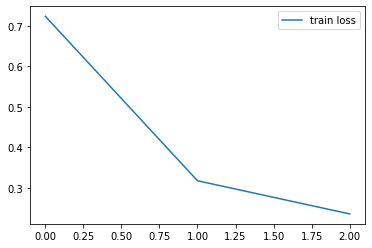

In [16]:
learner.plot_metrics()
        

prediction tensor(9, device='cuda:0')


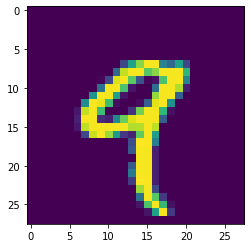

In [17]:
example = mnist[4][0]
prediction = torch.argmax(model(example.unsqueeze(dim=0).cuda()))
plt.imshow(example.squeeze())
print('prediction', prediction)

In [18]:
import torchvision.models as models

In [21]:
resnetmodel = models.resnet34(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/adzi885b/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100.0%


In [20]:
resnetmodel

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co